<a href="https://colab.research.google.com/github/Flighty07/Applied-statistic-project/blob/main/Copy_of_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [63]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm

In [39]:
# Load the data
df_superstore_marketing_date = pd.read_csv('/Superstore Marketing Data - Sheet1.csv')

In [40]:
# First look of the dataset(first five rows of the dataset)
df_superstore_marketing_date.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [41]:
#Shape of the dataset
df_superstore_marketing_date.shape

(2240, 22)

In [42]:
# check for duplicate values in dataset
len(df_superstore_marketing_date[df_superstore_marketing_date.duplicated()])

0

In [43]:
#For basic information about the dataset i used the info functionn which will show the number of the not null rows in column and datatype of the column
df_superstore_marketing_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

As we can see that there only 2216 rows in the datset which has value for the income column in dataset. We need to find that replace null values with the mean values of the income column

In [44]:
# Finding the missing values
number_of_missing_values = df_superstore_marketing_date.isnull().sum()
number_of_missing_values

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [45]:
#Calculate the mean value of the income
mean_income_value = df_superstore_marketing_date['Income'].mean()
#Fill the missing values of the income with mean value
df_superstore_marketing_date['Income'].fillna(mean_income_value,inplace=True)

In [46]:
print('Clean dataset after processing:')
df_superstore_marketing_date.head()

Clean dataset after processing:


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [47]:
#Statistical summary of the datset
summary_of_dataset=df_superstore_marketing_date.describe()
summary_of_dataset

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [48]:
#Showing the distribution of the data over year
fig = px.histogram(df_superstore_marketing_date, x='Year_Birth', nbins=30, title='Age Distribution', labels={'Year_Birth': 'Year of Birth'})
fig.show()

In [49]:
#Distribution of the data over the education
fig2 = px.bar(df_superstore_marketing_date['Education'].value_counts(), x=df_superstore_marketing_date['Education'].value_counts().index, y=df_superstore_marketing_date['Education'].value_counts().values)
fig2.update_layout(title='Distribution of Education')
fig2.update_xaxes(title='Education')
fig2.update_yaxes(title='Count')
fig2.show()

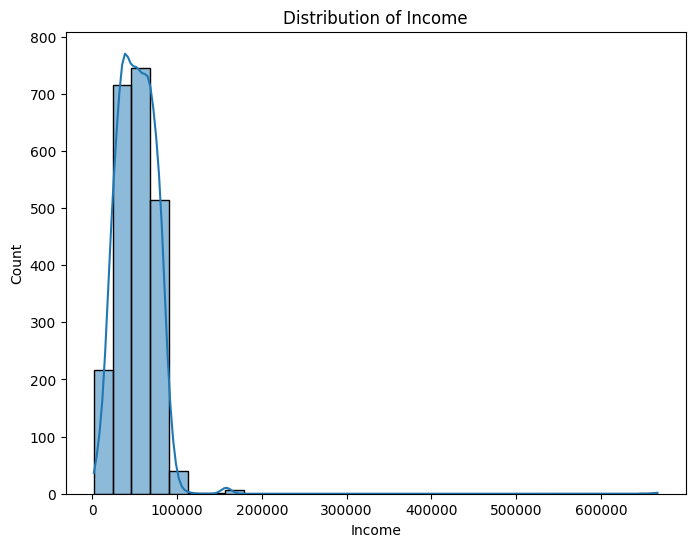

In [50]:
#Showing distribution of income
plt.figure(figsize=(8, 6))
sns.histplot(df_superstore_marketing_date['Income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.show()

In [51]:
#Showing distribution of marital status
fig4 = px.bar(df_superstore_marketing_date['Marital_Status'].value_counts(), x=df_superstore_marketing_date['Marital_Status'].value_counts().index, y=df_superstore_marketing_date['Marital_Status'].value_counts().values)
fig4.update_layout(title='Distribution of Marital Status')
fig4.update_xaxes(title='Marital Status')
fig4.update_yaxes(title='Count')
fig4.update_xaxes(tickangle=45)
fig4.show()

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

##Measure of the mean median and mode

In [53]:
# 1 : Mean (average value)
key_variable = ['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','MntGoldProds','NumWebPurchases','NumWebVisitsMonth']
mean = df_superstore_marketing_date[key_variable].mean()
print(f'Mean of selected variables of datasets are:\n {mean}')

Mean of selected variables of datasets are:
 Income               52247.251354
Recency                 49.109375
MntWines               303.935714
MntFruits               26.302232
MntMeatProducts        166.950000
MntFishProducts         37.525446
NumDealsPurchases        2.325000
MntGoldProds            44.021875
NumWebPurchases          4.084821
NumWebVisitsMonth        5.316518
dtype: float64


In [56]:
# 2 : Median (middle value)
key_variable = ['Income','Recency','Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth']
median =df_superstore_marketing_date[key_variable].median()
print(f'Median of key variables of datasets are:\n {median}')

Median of key variables of datasets are:
 Income               51741.5
Recency                 49.0
Kidhome                  0.0
Teenhome                 0.0
MntWines               173.5
MntFruits                8.0
MntMeatProducts         67.0
MntFishProducts         12.0
NumDealsPurchases        2.0
NumWebPurchases          4.0
NumWebVisitsMonth        6.0
dtype: float64


In [57]:
# 3 : Mode(most frequent value)
key_variable = ['Income','Recency','Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth']
mode = df_superstore_marketing_date[key_variable].mode()
print(f'Mode of key variables of datasets are:\n {mode}')

Mode of key variables of datasets are:
          Income  Recency  Kidhome  Teenhome  MntWines  MntFruits  \
0  52247.251354       56        0         0         2          0   

   MntMeatProducts  MntFishProducts  NumDealsPurchases  NumWebPurchases  \
0                7                0                  1                2   

   NumWebVisitsMonth  
0                  7  


##Measures of the dispersion of the data


In [58]:
# 4 : Variance
key_variable = ['Income','Recency','Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth']
variance = df_superstore_marketing_date[key_variable].var()
print(f'Variance of key variables of datasets are:\n {variance}')

Variance of key variables of datasets are:
 Income               6.268913e+08
Recency              8.388237e+02
Kidhome              2.898725e-01
Teenhome             2.965219e-01
MntWines             1.132978e+05
MntFruits            1.581926e+03
MntMeatProducts      5.094743e+04
MntFishProducts      2.984325e+03
NumDealsPurchases    3.733542e+00
NumWebPurchases      7.721252e+00
NumWebVisitsMonth    5.888606e+00
dtype: float64


In [60]:
# 5 : standard deviation
key_variable = ['Income','Recency','Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth']
standard_deviation = df_superstore_marketing_date[key_variable].std()
print(f'Standard deviation of key variables of datasets are:\n {standard_deviation}')

Standard deviation of key variables of datasets are:
 Income               25037.797168
Recency                 28.962453
Kidhome                  0.538398
Teenhome                 0.544538
MntWines               336.597393
MntFruits               39.773434
MntMeatProducts        225.715373
MntFishProducts         54.628979
NumDealsPurchases        1.932238
NumWebPurchases          2.778714
NumWebVisitsMonth        2.426645
dtype: float64


## Identify the outliers in the key variables

In [62]:
key_variables = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                 'NumDealsPurchases', 'MntGoldProds', 'NumWebPurchases', 'NumWebVisitsMonth']

for variable in key_variables:
    fig = px.box(df_superstore_marketing_date, y=variable, title=f'Boxplot of {variable}')
    fig.show()

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [64]:
# Calculate total purchases
total_purchases_superstore = df_superstore_marketing_date[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Calculate probability of a purchase
p_purchase_superstore = total_purchases_superstore.mean() / total_purchases_superstore.max()

# Calculate expected total purchases
expected_purchases_superstore = total_purchases_superstore.mean()

# Calculate statistics for income
mu_income_superstore, sigma_income_superstore = df_superstore_marketing_date['Income'].mean(), df_superstore_marketing_date['Income'].std()
prob_income_gt_70000_superstore = 1 - norm.cdf(70000, mu_income_superstore, sigma_income_superstore)
expected_income_superstore = mu_income_superstore + sigma_income_superstore * norm.ppf(prob_income_gt_70000_superstore)

# Print the results
print("Probability Distributions and Calculated Values:")
print(f"Total Purchases Superstore:")
print(f"   Probability of a purchase: {p_purchase_superstore:.4f}")
print(f"   Expected number of purchases: {expected_purchases_superstore:.2f}")

print(f"\nIncome Superstore:")
print(f"   Probability of income > $70,000: {prob_income_gt_70000_superstore:.4f}")
print(f"   Expected income: {expected_income_superstore:.2f}")

Probability Distributions and Calculated Values:
Total Purchases Superstore:
   Probability of a purchase: 0.3378
   Expected number of purchases: 14.86

Income Superstore:
   Probability of income > $70,000: 0.2392
   Expected income: 34494.50


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [65]:
# Calculate Total Spend
df_superstore_marketing_date['TotalSpend'] = df_superstore_marketing_date[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Create Scatter Plot
fig = px.scatter(df_superstore_marketing_date, x='Income', y='TotalSpend', title='Relationship between Income and Total Spending')
fig.update_layout(xaxis_title='Income', yaxis_title='Total Spending')
fig.show()

In [67]:
# Exclude non-numeric columns from correlation calculation
numeric_df = df_superstore_marketing_date.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize correlation matrix using a heatmap
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.index,
                   colorscale='Viridis',
                   colorbar=dict(title='Correlation')
))

fig.update_layout(title='Correlation Matrix',
                  xaxis_title='Features',
                  yaxis_title='Features',
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed')

fig.show()

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

In [74]:
# Calculate spending rate
df_superstore_marketing_date['SpendingRate'] = df_superstore_marketing_date['TotalSpend'] / df_superstore_marketing_date['Income']

# Calculate average spending rate for each education category
average_spending_rate = df_superstore_marketing_date.groupby('Education')['SpendingRate'].mean().reset_index()

# Create bar plot
fig = px.bar(average_spending_rate, x='Education', y='SpendingRate', title='Spending Rate across Different Education Levels',
             labels={'Education': 'Education Level', 'SpendingRate': 'Average Spending Rate'})

# Show plot
fig.show()

Insight : People who falls in the category of the basic level of education have higher spending rate

Recommendation : They should include some items in the store  which will
attract the comtomer of the other eduction level and provide some offers and discount to get customer from that category

In [75]:
average_spending_rate_marital = df_superstore_marketing_date.groupby('Marital_Status')['SpendingRate'].mean().reset_index()

# Create bar plot
fig = px.bar(average_spending_rate_marital, x='Marital_Status', y='SpendingRate', title='Spending Rate across Different Marital Statuses',
             labels={'Marital_Status': 'Marital Status', 'SpendingRate': 'Average Spending Rate'})

# Show plot
fig.show()

Insight : People with marital status of the "YOLO" which mean "you live only once " have higher spending rate as they spend more on themselves with worrying about anything and also the people who are divorced also have higher spending rate

Recommendation : They should include some products in the store for the people who are together or make scheme which will give them discount if they are married or together

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍